In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

Download SVHN dataset 

In [ ]:
# download train and test data
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

Preprocessing steps from https://github.com/aditya9211/SVHN-CNN/blob/master/data_preprocess.ipynb

Dataset is a numpy ndarray of shape (size, width, height, channels)

In [ ]:
# helper function for loading a MAT-File
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

# transposing the the train and test data by converting it from  (width, height, channels, size) -> (size, width, height, channels)
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [ ]:
# plotting function for fig in n rows X m columns
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

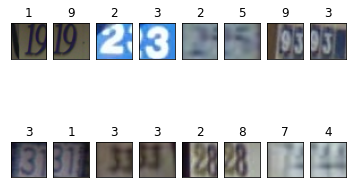

In [ ]:
# plot some of the training images
plot_images(X_train, y_train, 2, 8)

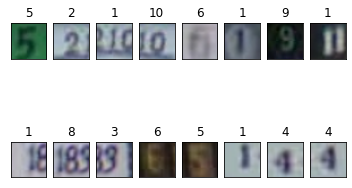

In [ ]:
# plot some test set images
plot_images(X_test, y_test, 2, 8)

In [ ]:
# to check unique labels
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


2